# Description

TBD.....

# Load Libraries

## Visualization / Heatmap Libraries

In [41]:
#%matplotlib notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


## Dataframe and Math Function Libraries

In [42]:
from __future__ import print_function
import numpy as np
import pandas as pd
#!pip install --upgrade pip
#!pip install xlrd

# Load Data And Explore

## Google Download (eventually API)

https://takeout.google.com/

## Import

In [43]:
import os
filePath = 'c:\\Users\\igoej\\OneDrive\\Documents\\GitHub\\DataAnalytics\\Data\\2020-09-23 Daily Summaries.csv'
df_fit = pd.read_csv(filePath)
df_fit.tail()

,Date,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
2619,2020-09-19,2659.425684,11385.876482,77.159181,130.995575,49.411488,40.742403,-73.980641,40.778630,-73.960540,...,NaN,NaN,21720000.0,NaN,NaN,NaN,2700000.0,600000.0,NaN,NaN
2620,2020-09-20,2345.127479,3175.745182,76.631855,137.841537,52.059628,40.741971,-73.976811,40.743314,-73.975982,...,NaN,NaN,8940000.0,NaN,NaN,NaN,16980000.0,3240000.0,660000.0,NaN
2621,2020-09-21,2580.027164,1947.475325,70.612538,156.708023,51.089741,40.743228,-73.976126,40.743245,-73.975997,...,2605333.0,NaN,4740000.0,NaN,NaN,NaN,7740000.0,3420000.0,NaN,NaN
2622,2020-09-22,2024.253131,1712.365260,68.292605,125.088547,49.270679,40.742889,-73.976470,40.743253,-73.976016,...,NaN,NaN,2160000.0,NaN,NaN,NaN,10680000.0,6480000.0,420000.0,NaN
2623,2020-09-23,681.369231,46.746750,64.777501,121.049873,54.264690,40.742327,-73.976590,40.742336,-73.976539,...,NaN,NaN,14100000.0,NaN,NaN,NaN,5460000.0,1440000.0,480000.0,NaN


In [44]:
df_fit.head()

,Date,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
0,2012-09-18,1185.313721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-09-19,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-09-20,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-09-21,1339.213242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-09-22,1778.499743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     2624 non-null   object 
 1   Calories (kcal)                          2442 non-null   float64
 2   Distance (m)                             1952 non-null   float64
 3   Average heart rate (bpm)                 704 non-null    float64
 4   Max heart rate (bpm)                     704 non-null    float64
 5   Min heart rate (bpm)                     704 non-null    float64
 6   Low latitude (deg)                       905 non-null    float64
 7   Low longitude (deg)                      905 non-null    float64
 8   High latitude (deg)                      905 non-null    float64
 9   High longitude (deg)                     905 non-null    float64
 10  Average speed (m/s)                      1745 no

In [46]:
df_fit.describe()

,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
count,2442.000000,1952.000000,704.000000,704.000000,704.000000,905.000000,905.000000,905.000000,905.000000,1745.000000,...,5.200000e+01,3.000000e+00,2.500000e+01,1.0,1.100000e+01,1.570000e+02,2.900000e+01,2.900000e+01,2.000000e+01,4.000000
mean,2248.447774,4610.642927,111.181440,150.094511,73.508863,39.504950,-71.574255,39.973536,-70.741836,1.426652,...,2.235390e+06,1.988191e+06,7.192800e+06,1654967.0,2.010573e+06,1.784455e+06,1.060966e+07,5.975172e+06,6.840000e+05,100126.500000
std,588.813536,7078.341465,19.909053,18.654665,15.342246,7.581056,13.738074,6.330836,15.639986,3.044963,...,1.358018e+06,4.419411e+05,5.663391e+06,NaN,6.953297e+05,9.729297e+05,4.443099e+06,3.706271e+06,4.033857e+05,19.570386
min,0.000000,0.000000,63.635036,72.000000,20.000000,0.000000,-87.635437,0.000000,-87.635437,0.000000,...,6.300000e+01,1.589930e+06,1.200000e+05,1654967.0,1.209576e+06,2.270000e+05,2.700000e+06,6.000000e+05,3.000000e+05,100102.000000
25%,2023.575618,2425.755820,101.459209,136.000000,60.000000,40.742312,-73.982465,40.746048,-73.975923,0.650882,...,1.519970e+06,1.750465e+06,2.760000e+06,1654967.0,1.439207e+06,9.000000e+05,7.620000e+06,2.520000e+06,4.050000e+05,100117.750000
50%,2299.334846,4137.252612,114.631141,153.000000,75.000000,40.743036,-73.981744,40.749333,-73.975076,0.912325,...,2.189810e+06,1.911000e+06,5.400000e+06,1654967.0,1.697672e+06,1.637000e+06,1.044000e+07,5.580000e+06,6.000000e+05,100127.500000
75%,2561.094795,5775.569200,125.866238,164.000000,85.000000,40.743451,-73.977623,40.752140,-73.974333,1.319671,...,2.621904e+06,2.187321e+06,9.960000e+06,1654967.0,2.550316e+06,2.695000e+06,1.422000e+07,8.880000e+06,8.100000e+05,100136.250000
max,5787.936138,292370.773208,148.602214,226.000000,114.000000,55.679828,12.584370,55.688120,12.650080,89.422981,...,9.370067e+06,2.463642e+06,2.172000e+07,1654967.0,3.310903e+06,4.638000e+06,1.764000e+07,1.248000e+07,1.920000e+06,100149.000000


In [47]:
df_fit.describe(include='object')

,Date,Blood glucose specimen source
count,2624,233
unique,2624,1
top,2019-02-20,Interstitial fluid
freq,1,233


# Shared Functions

## Correlation

In [49]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered

In [50]:
def corrFilterFlattened(x: pd.DataFrame, bound: float):
    xFiltered = corrFilter(x, bound)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened


In [51]:
def filterForLabels(df: pd.DataFrame, label):  
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

## Basic

In [52]:
def MedianFunction(df, roundValue):
    import statistics as stat
    cleaned = df.dropna()
    return round(stat.median(cleaned), roundValue)

In [53]:
def AverageFunction(df, roundValue):
    cleaned = df.dropna()
    return round(sum(cleaned)/len(cleaned), roundValue)

# Data Clean and Prep

In [54]:
df_fit.dropna(axis=1, how='all', inplace=True)

## Google Specific

In [55]:
df_fit.set_index('Date')

,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-18,1185.313721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-19,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-20,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-21,1339.213242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-22,1778.499743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-19,2659.425684,11385.876482,77.159181,130.995575,49.411488,40.742403,-73.980641,40.778630,-73.960540,0.506334,...,NaN,NaN,21720000.0,NaN,NaN,NaN,2700000.0,600000.0,NaN,NaN
2020-09-20,2345.127479,3175.745182,76.631855,137.841537,52.059628,40.741971,-73.976811,40.743314,-73.975982,0.576205,...,NaN,NaN,8940000.0,NaN,NaN,NaN,16980000.0,3240000.0,660000.0,NaN
2020-09-21,2580.027164,1947.475325,70.612538,156.708023,51.089741,40.743228,-73.976126,40.743245,-73.975997,0.467862,...,2605333.0,NaN,4740000.0,NaN,NaN,NaN,7740000.0,3420000.0,NaN,NaN


## Set Aggregate Values

In [56]:
df_fit['SleepSum'] = df_fit['Deep sleeping duration (ms)'] + df_fit['Light sleeping duration (ms)'] + df_fit['Sleep duration (ms)']
df_fit['sleepSumHours'] = df_fit['SleepSum'] / 3600000

In [57]:
df_fit['basketballMinutes'] = df_fit['Basketball duration (ms)'] / 60000
df_fit['rowingMachineMinutes'] = df_fit['Rowing machine duration (ms)']/ 60000

## Lag/Shift Values

In [58]:
df_fit['rowingMachineMinutesShifted'] = df_fit['rowingMachineMinutes'].shift()
df_fit['moveMinutesCountShifted'] = df_fit['Move Minutes count'].shift()
df_fit['heartPointsShifted'] = df_fit['Heart Points'].shift()
df_fit['distanceShifted'] = df_fit['Distance (m)'].shift()
df_fit['basketballMinutesShifted'] = df_fit['basketballMinutes'].shift()


In [155]:
df_fit.columns

Index(['Date', 'Calories (kcal)', 'Distance (m)', 'Average heart rate (bpm)',
       'Max heart rate (bpm)', 'Min heart rate (bpm)', 'Low latitude (deg)',
       'Low longitude (deg)', 'High latitude (deg)', 'High longitude (deg)',
       'Average speed (m/s)', 'Max speed (m/s)', 'Min speed (m/s)',
       'Step count', 'Average weight (kg)', 'Max weight (kg)',
       'Min weight (kg)', 'Average systolic blood pressure (mmHg)',
       'Max systolic blood pressure (mmHg)',
       'Min systolic blood pressure (mmHg)',
       'Average diastolic blood pressure (mmHg)',
       'Max diastolic blood pressure (mmHg)',
       'Min diastolic blood pressure (mmHg)', 'Average blood glucose (mmol/L)',
       'Max blood glucose (mmol/L)', 'Min blood glucose (mmol/L)',
       'Blood glucose specimen source', 'Move Minutes count', 'Heart Points',
       'Heart Minutes', 'Biking duration (ms)', 'Inactive duration (ms)',
       'Unknown duration (ms)', 'Walking duration (ms)',
       'Running duration (m

# Create Correlation Heat Map and List

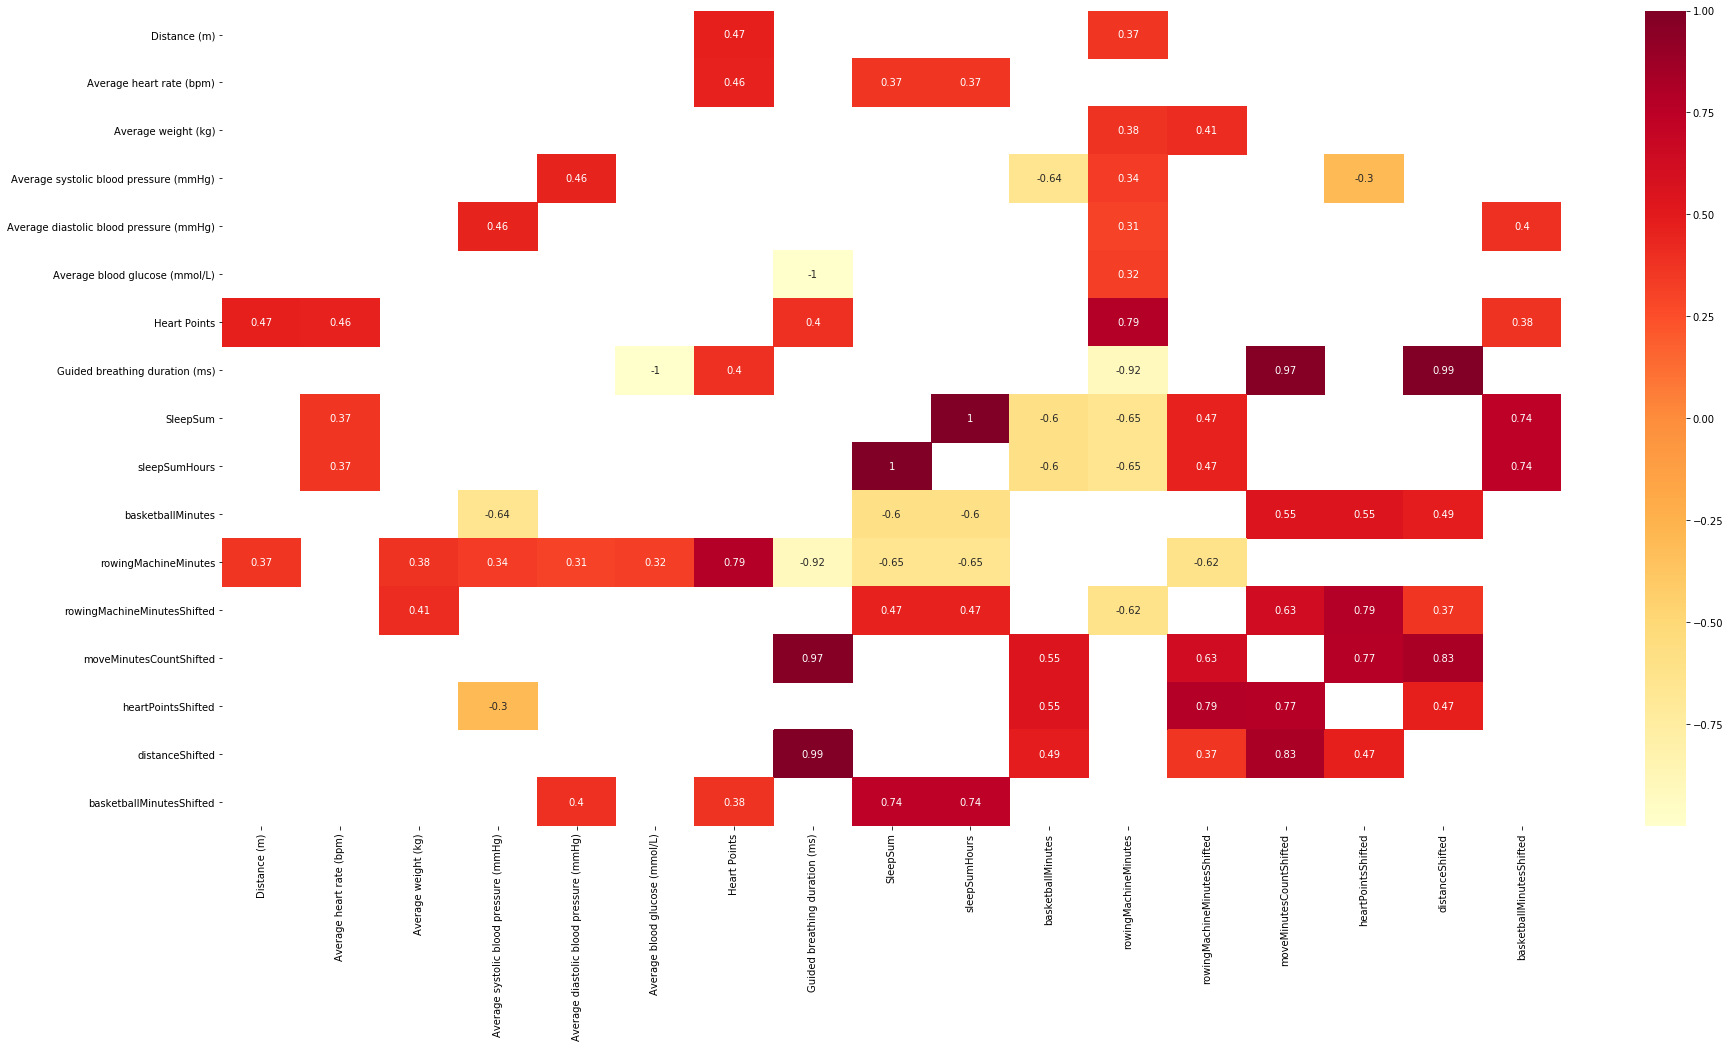

In [156]:
#set data set for analysis
df = df_fit[['Distance (m)', 'Average heart rate (bpm)','Average weight (kg)','Average systolic blood pressure (mmHg)','Average diastolic blood pressure (mmHg)','Average blood glucose (mmol/L)','Heart Points','Guided breathing duration (ms)','SleepSum', 'sleepSumHours','basketballMinutes', 'rowingMachineMinutes','rowingMachineMinutesShifted', 'moveMinutesCountShifted','heartPointsShifted', 'distanceShifted', 'basketballMinutesShifted']]
filterValue = 0.3
plt.figure(figsize=(30,15))
sns.heatmap(corrFilter(df, filterValue), annot=True, cmap="YlOrRd")
plt.show()

In [157]:
corr_fit_filtered = corrFilterFlattened(df, filterValue)
half = corr_fit_filtered.count() / 2
corr_fit_filtered

Guided breathing duration (ms)           Average blood glucose (mmol/L)            -0.999600
rowingMachineMinutes                     Guided breathing duration (ms)            -0.919420
                                         SleepSum                                  -0.651956
                                         sleepSumHours                             -0.651956
basketballMinutes                        Average systolic blood pressure (mmHg)    -0.640924
rowingMachineMinutes                     rowingMachineMinutesShifted               -0.620488
SleepSum                                 basketballMinutes                         -0.598466
basketballMinutes                        sleepSumHours                             -0.598466
Average systolic blood pressure (mmHg)   heartPointsShifted                        -0.300224
Average diastolic blood pressure (mmHg)  rowingMachineMinutes                       0.306912
Average blood glucose (mmol/L)           rowingMachineMinutes         

# Measures

## Blood Pressure


In [160]:
filterForLabels(corr_fit_filtered, 'Average systolic blood pressure (mmHg)')

,Corr
heartPointsShifted,-0.300224
Average diastolic blood pressure (mmHg),0.457410
basketballMinutes,-0.640924
rowingMachineMinutes,0.340486


In [161]:
filterForLabels(corr_fit_filtered, 'Average diastolic blood pressure (mmHg)')

,Corr
rowingMachineMinutes,0.306912
basketballMinutesShifted,0.397027
Average systolic blood pressure (mmHg),0.457410


In [162]:
dia = df['Average diastolic blood pressure (mmHg)']
sys = df['Average systolic blood pressure (mmHg)']
print('BP (avg):', AverageFunction(sys,1), '/', AverageFunction(dia,1))
print('BP (median):',MedianFunction(sys,1), '/', MedianFunction(dia,1))

BP (avg): 124.5 / 80.3
BP (median): 125.2 / 80.0


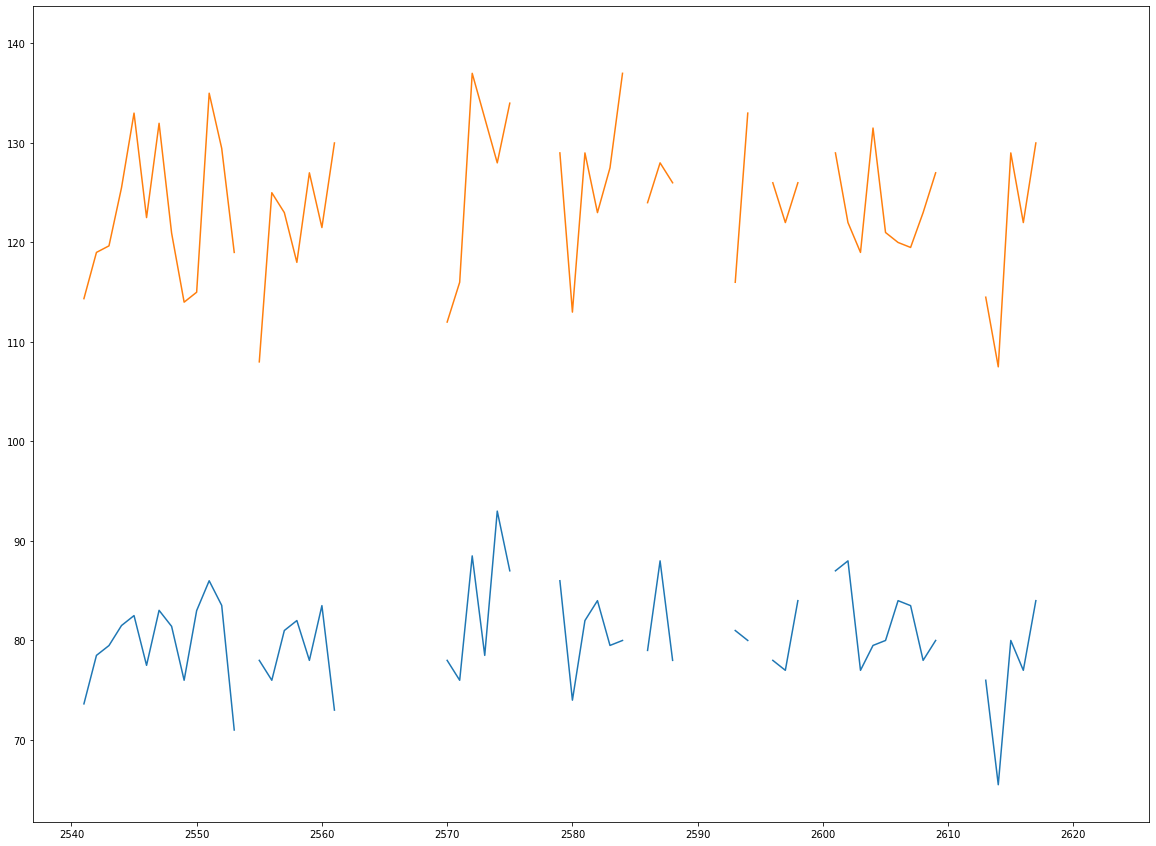

In [163]:
plt.figure(figsize=(20,15))
plt.plot(df.index, df['Average diastolic blood pressure (mmHg)'])
plt.plot(df.index, df['Average systolic blood pressure (mmHg)'])
plt.xlabel = 'None'
plt.show()


(115, 146.09788020750926)

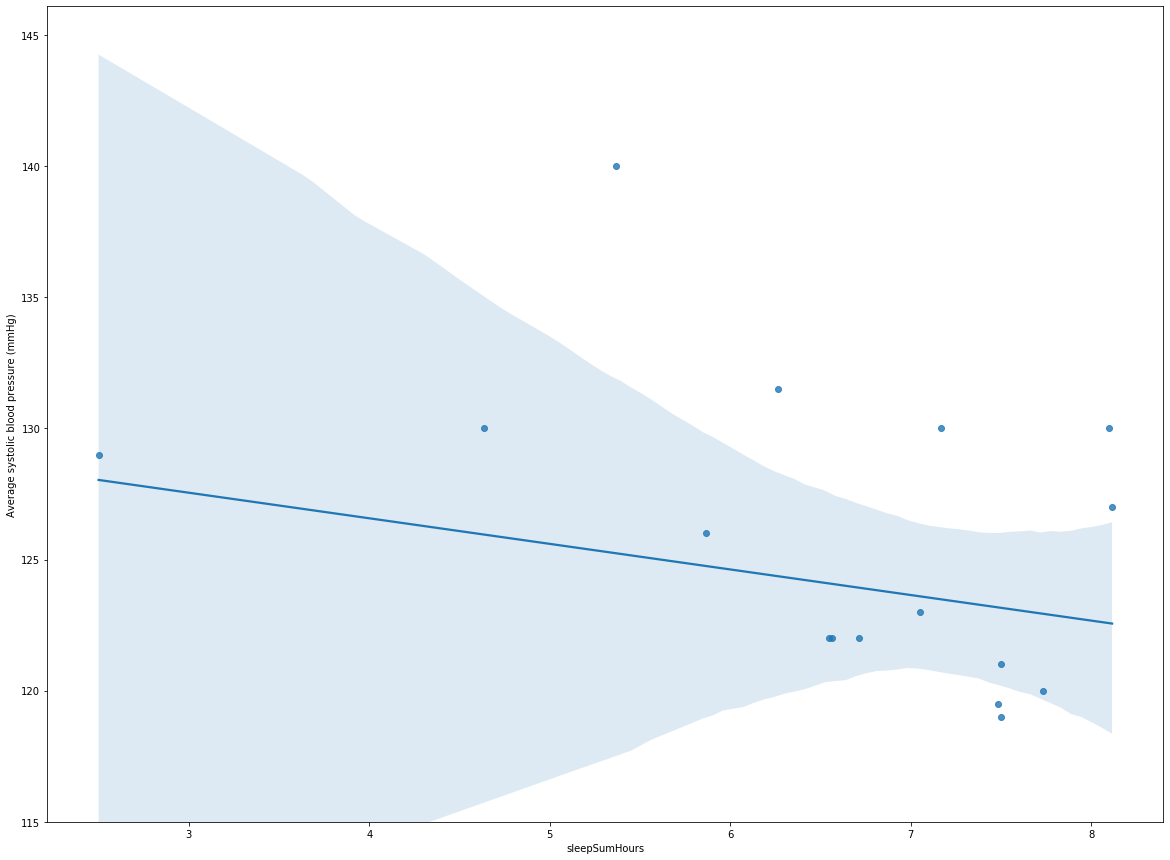

In [164]:
plt.figure(figsize=(20,15))
sns.regplot(x='sleepSumHours', y='Average systolic blood pressure (mmHg)', data=df)
plt.ylim(115,)

(100, 141.62945180279618)

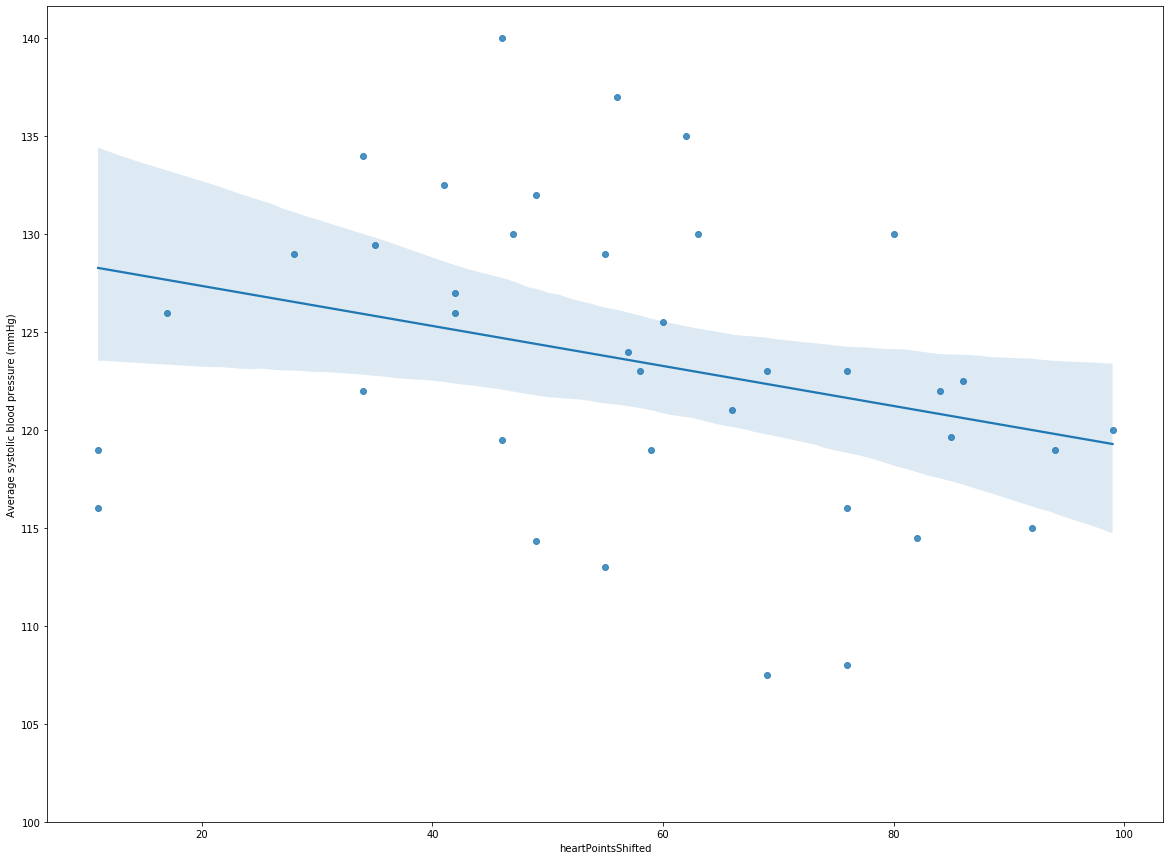

In [185]:
plt.figure(figsize=(20,15))
sns.regplot(x='heartPointsShifted', y='Average systolic blood pressure (mmHg)', data=df)
plt.ylim(100,)

## Heart Rate

In [165]:
filterForLabels(corr_fit_filtered, 'Average heart rate (bpm)')

,Corr
Heart Points,0.462877
SleepSum,0.374826
sleepSumHours,0.374826


## Glucose

In [166]:
filterForLabels(corr_fit_filtered, 'Average blood glucose (mmol/L)')

,Corr
rowingMachineMinutes,0.320476
Guided breathing duration (ms),-0.999600


In [167]:
bg = df['Average blood glucose (mmol/L)']
print('BG (mmol/L):', AverageFunction(bg, 1))
print('BG (mmg/dl):', round(AverageFunction(bg, 1) * 18))

BG (mmol/L): 7.6
BG (mmg/dl): 137


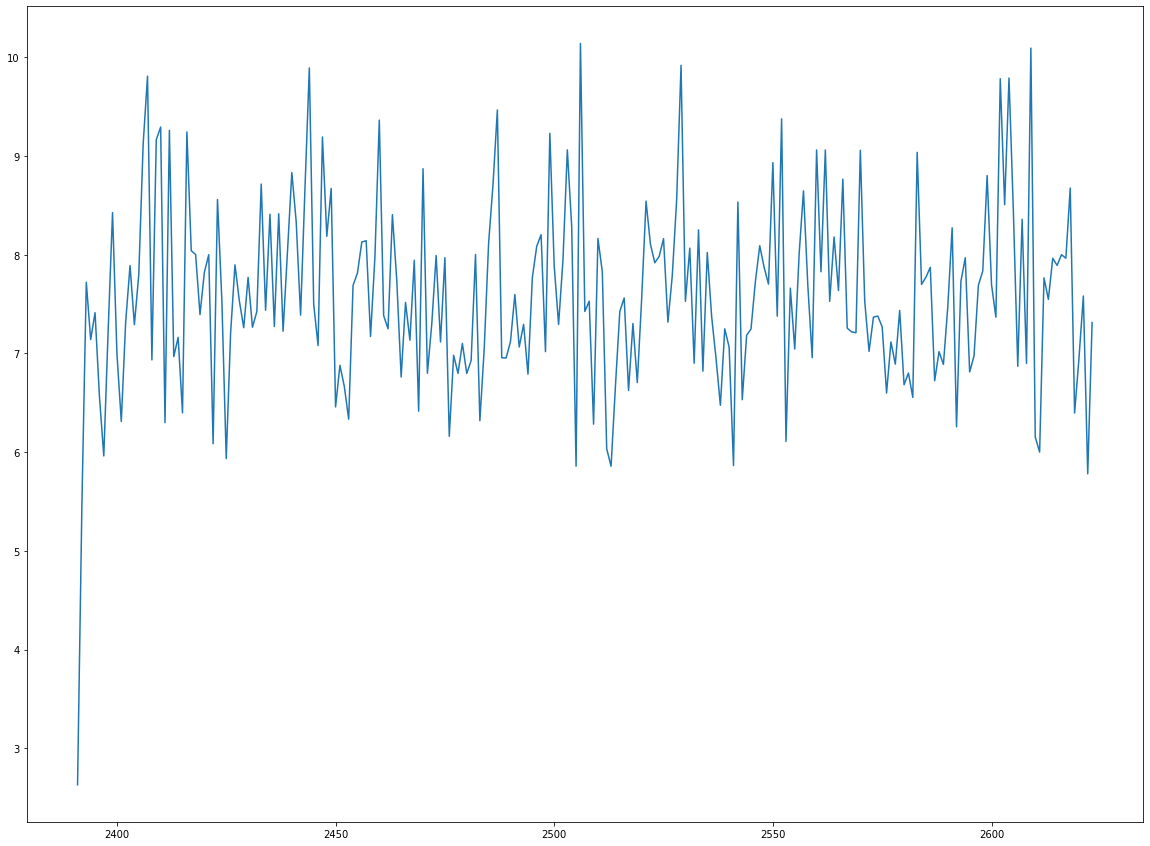

In [168]:
plt.figure(figsize=(20,15))
plt.plot(df.index, df['Average blood glucose (mmol/L)'])
plt.show()

## Weight

In [169]:
filterForLabels(corr_fit_filtered, 'Average weight (kg)')

,Corr
rowingMachineMinutes,0.381139
rowingMachineMinutesShifted,0.412896


In [170]:
w = df['Average weight (kg)']
print('Weight (kg):', AverageFunction(w, 1))
print('Weight (lbs):', round(AverageFunction(w, 1) * 2.2,1))


Weight (kg): 101.2
Weight (lbs): 222.6


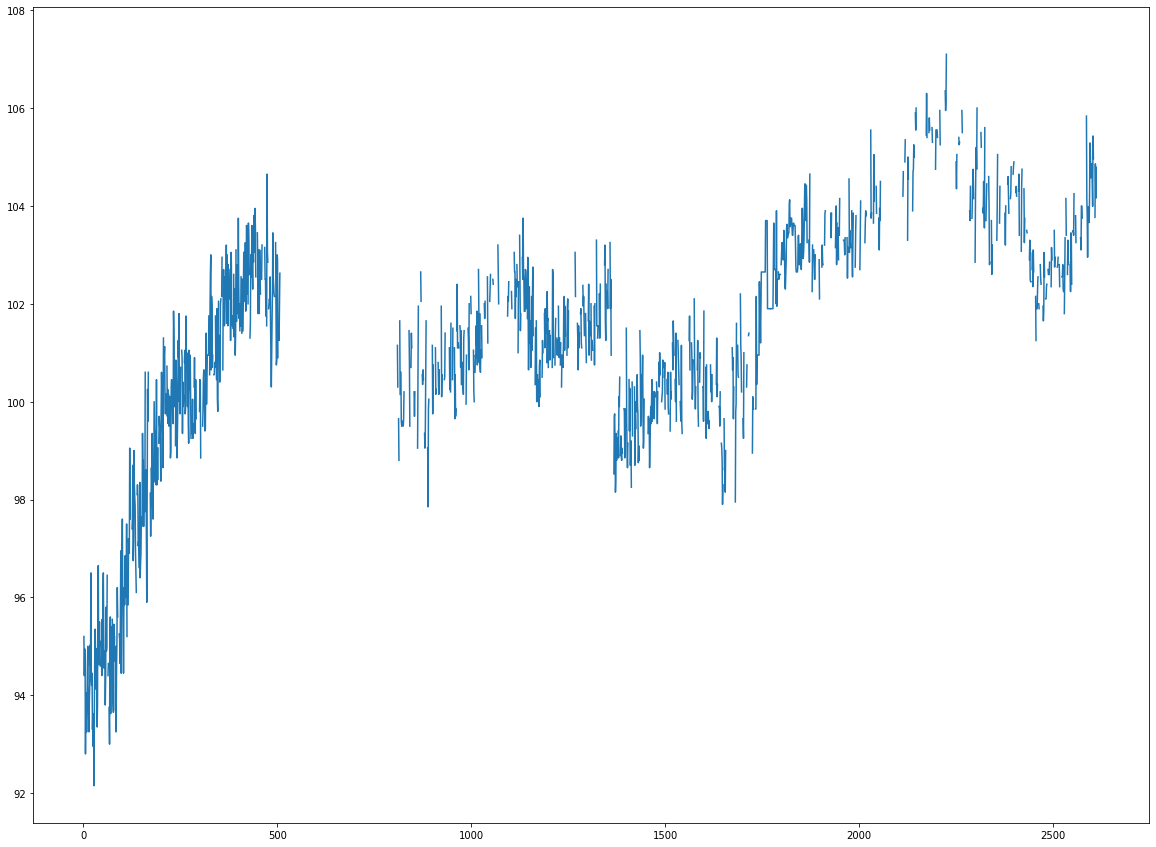

In [171]:
plt.figure(figsize=(20,15))
plt.plot(df.index, df['Average weight (kg)'])
plt.show()

## Sleep

In [172]:
filterForLabels(corr_fit_filtered, 'sleepSumHours')

,Corr
Average heart rate (bpm),0.374826
rowingMachineMinutesShifted,0.467229
rowingMachineMinutes,-0.651956
basketballMinutes,-0.598466
SleepSum,1.000000


In [179]:
print('Sleep:', AverageFunction(df['sleepSumHours'],2))
print('Sleep (Median):', MedianFunction(df['sleepSumHours'], 2))

Sleep: 6.43
Sleep (Median): 6.7


(115, 148.60732180834046)

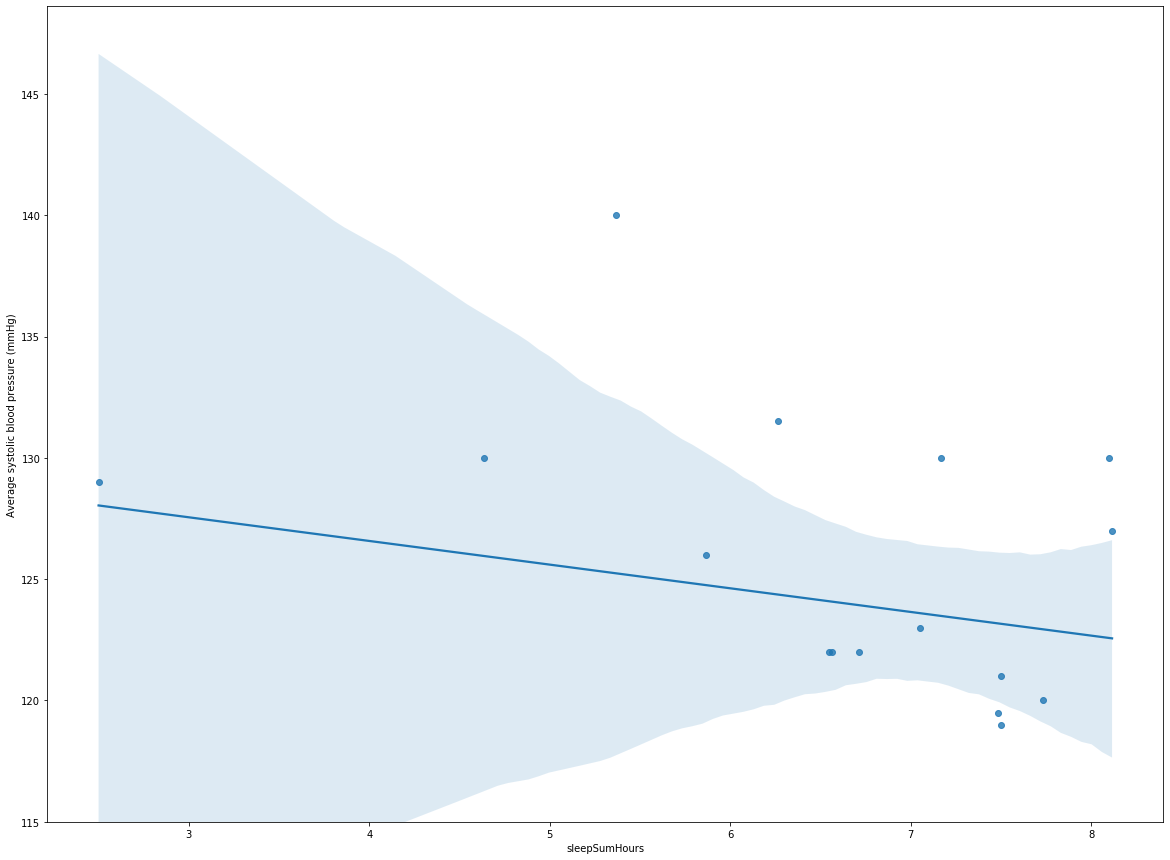

In [174]:
plt.figure(figsize=(20,15))
sns.regplot(x='sleepSumHours', y='Average systolic blood pressure (mmHg)', data=df)
plt.ylim(115,)

(10, 49.48368799088013)

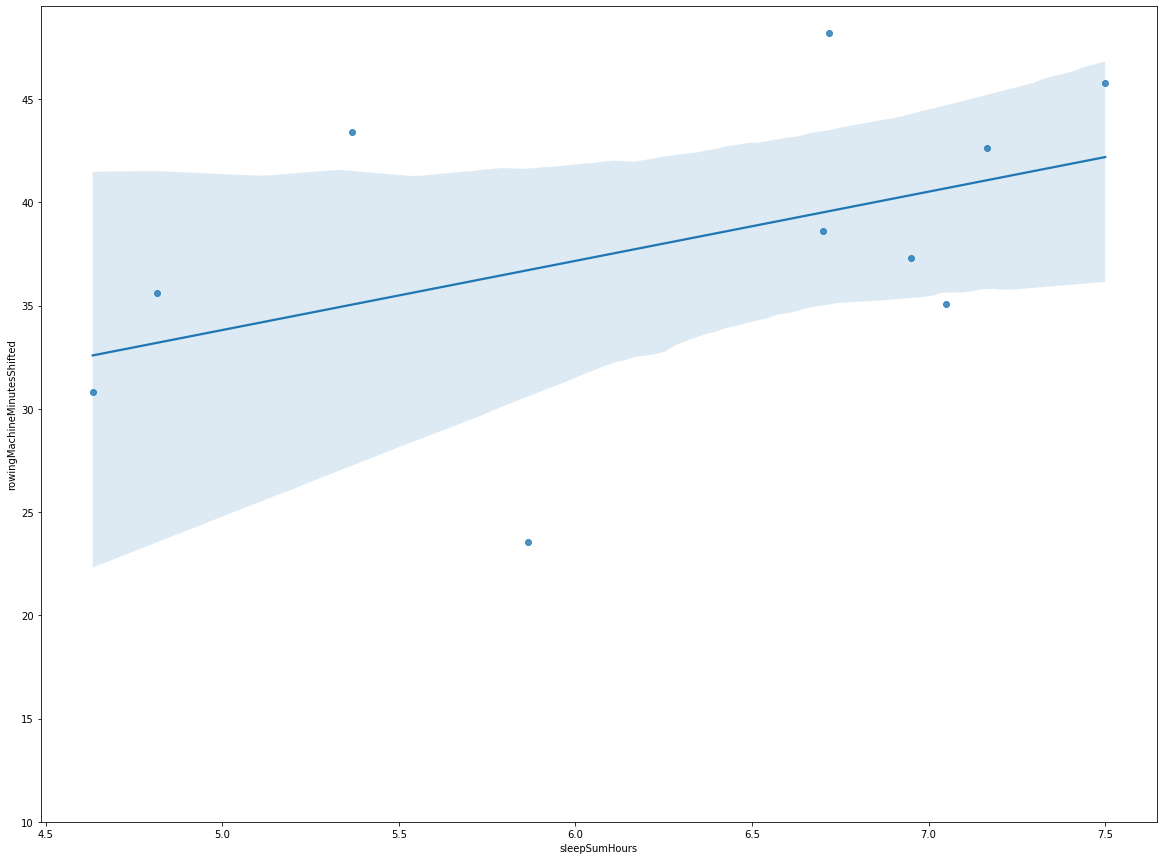

In [175]:
plt.figure(figsize=(20,15))
sns.regplot(x='sleepSumHours', y='rowingMachineMinutesShifted', data=df)
plt.ylim(10,)

## Activity

In [176]:
filterForLabels(corr_fit_filtered, 'distanceShifted')

,Corr
Guided breathing duration (ms),0.991412
heartPointsShifted,0.470458
basketballMinutes,0.486558
moveMinutesCountShifted,0.827839


In [177]:
filterForLabels(corr_fit_filtered, 'rowingMachineMinutesShifted')

,Corr
moveMinutesCountShifted,0.632609
rowingMachineMinutes,-0.620488
Average weight (kg),0.412896
SleepSum,0.467229
sleepSumHours,0.467229


In [178]:
filterForLabels(corr_fit_filtered, 'basketballMinutesShifted')

,Corr
Heart Points,0.376336
Average diastolic blood pressure (mmHg),0.397027
SleepSum,0.736467


(10, 46.01423809055617)

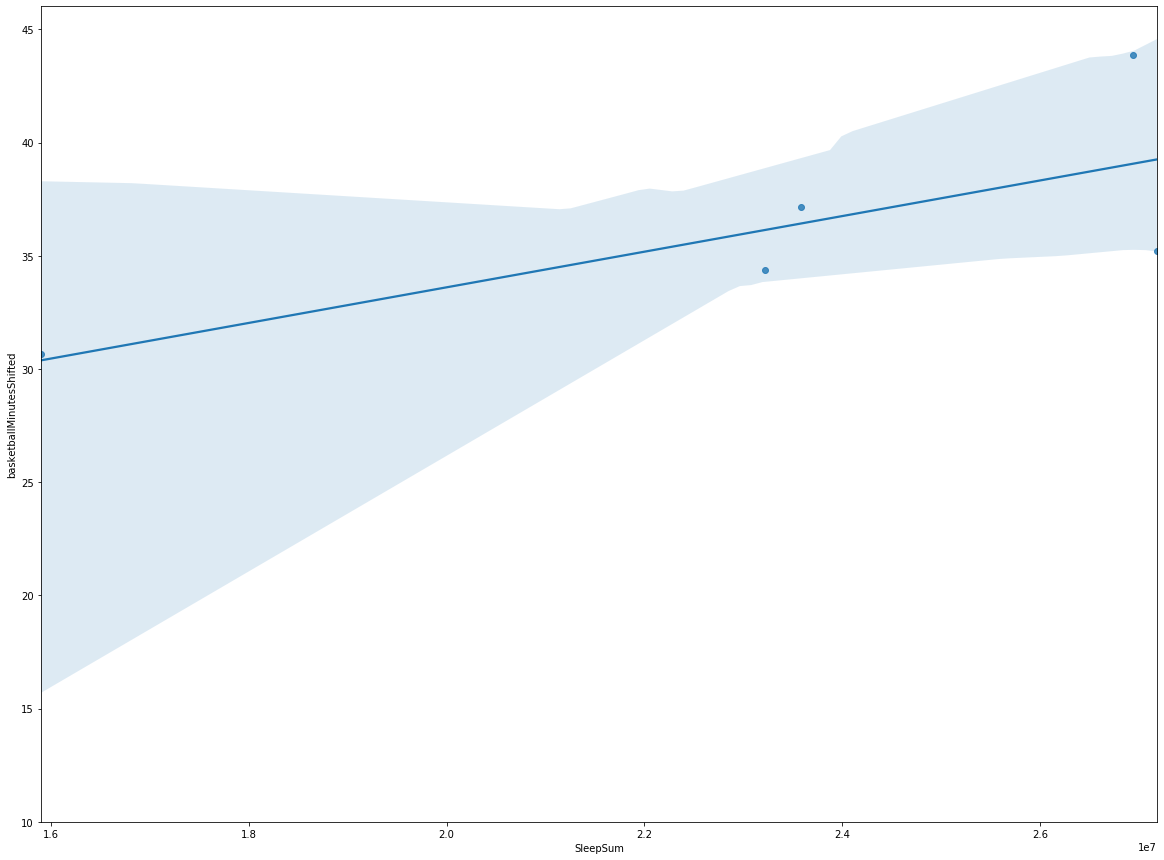

In [181]:
plt.figure(figsize=(20,15))
sns.regplot(x='SleepSum', y='basketballMinutesShifted', data=df)
plt.ylim(10,)